<a href="https://colab.research.google.com/github/rajviishah/Real-Estate-Investment/blob/main/Regression-DownSampling/Regression-Muller-Loop-Smogn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#downsampling using smogn
#https://datascience.stackexchange.com/questions/69085/smote-for-regression
#https://github.com/nickkunz/smogn

In [1]:
!pip install smogn

In [2]:
!pip install git+https://github.com/nickkunz/smogn.git

  Cloning https://github.com/nickkunz/smogn.git to /tmp/pip-req-build-w_6_8cu9
  Running command git clone -q https://github.com/nickkunz/smogn.git /tmp/pip-req-build-w_6_8cu9
  Created wheel for smogn: filename=smogn-0.1.1-py3-none-any.whl size=30364 sha256=aac5f248f2fd7d8abcdc9375bc3dbfbf76cb66c9d1a270304c8d99ca125a87c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-_rgzuw5v/wheels/31/bb/2b/423f632f38f777fa7f7bd73085e546acf69c233b08a4466a1c
Successfully built smogn
  Attempting uninstall: smogn
    Found existing installation: smogn 0.1.2
    Uninstalling smogn-0.1.2:
      Successfully uninstalled smogn-0.1.2


In [3]:
%%capture
import smogn
import pandas
import seaborn

In [20]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [45]:
housing = pd.read_csv("/content/drive/MyDrive/CMPE 257 - Project/sarjak_new_clean_train.csv")

In [46]:
housing = housing.drop(['Unnamed: 0'], axis = 1)

In [47]:
housing_smogn = smogn.smoter(
    
    data = housing,  ## pandas dataframe
    y = 'SalePrice'  ## string ('header name')
)

r_index: 100%|##########| 84/84 [00:00<00:00, 130.16it/s]


In [24]:
## dimensions - original data 
housing.shape

(1460, 80)

In [25]:
## dimensions - modified data
housing_smogn.shape

(1244, 80)

In [ ]:
#housing[housing.index.duplicated()]

In [ ]:
#housing.loc[~housing.index.duplicated(), :]

In [ ]:
## plot y distribution 
##seaborn.kdeplot(housing['SalePrice'], label = "Original")
#seaborn.kdeplot(housing_smogn['SalePrice'], label = "Modified")

In [48]:
housing_smogn = housing_smogn.reset_index()

In [12]:
#housing_smogn.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_smogn = np.nan_to_num(housing)

In [51]:
normalized_X=(housing_smogn-housing_smogn.min())/(housing_smogn.max()-housing_smogn.min())
normalized_X

,index,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,0.000000,0.25,1.0,1.0,1.0,NaN,1.0,0.0,0.875000,0.25,...,0.0,0.0,0.00000,0.454545,0.8,0.301557,0.007752,0.220910,0.714286,0.334235
1,0.000686,0.25,1.0,1.0,1.0,NaN,1.0,0.0,0.875000,0.25,...,0.0,0.0,0.00000,0.272727,0.8,0.301780,0.031008,0.000000,0.714286,0.367189
2,0.001373,0.25,1.0,1.0,1.0,NaN,1.0,0.0,0.750000,0.25,...,0.0,0.0,0.00000,0.727273,0.8,0.302945,0.007752,0.333333,0.644745,0.310070
3,0.002059,0.25,1.0,1.0,1.0,NaN,1.0,0.0,0.875000,0.25,...,0.0,0.0,0.00000,0.363636,0.8,0.301557,0.023256,0.041984,0.714286,0.359364
4,0.002745,0.50,1.0,1.0,1.0,NaN,1.0,0.0,0.875000,0.25,...,0.0,0.0,0.00000,0.181818,0.8,0.301780,0.031008,0.000000,0.714286,0.370492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,0.995882,0.75,1.0,1.0,1.0,NaN,1.0,0.0,0.875000,0.25,...,0.0,0.0,0.00000,0.363636,0.8,0.349844,0.007752,0.000000,0.571429,0.384450
1240,0.996568,1.00,1.0,1.0,1.0,NaN,1.0,0.0,0.291667,0.25,...,0.0,0.0,0.00000,0.363636,0.2,0.152412,0.007752,0.333333,0.285714,0.131017
1241,0.997941,0.25,1.0,1.0,1.0,NaN,1.0,0.0,0.875000,0.25,...,0.0,0.0,0.00000,0.818182,0.8,0.207991,0.038760,0.333333,0.571429,0.267163
1242,0.998627,0.75,1.0,1.0,1.0,NaN,1.0,0.0,0.333333,0.25,...,0.0,0.0,0.00000,0.636364,0.4,0.194096,0.062016,0.000000,0.714286,0.293300


In [59]:
normalized_X = normalized_X.fillna(0.0)

In [61]:
normalized_X.isnull().values.any()

False

In [64]:
normalized_X.to_csv('/content/drive/MyDrive/CMPE 257 - Project/smogn_clean_train.csv')

In [63]:
normalized_X.values.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([[0.00000000e+00, 2.50000000e-01, 1.00000000e+00, ...,
        2.20909560e-01, 7.14285714e-01, 3.34234538e-01],
       [6.86341798e-04, 2.50000000e-01, 1.00000000e+00, ...,
        0.00000000e+00, 7.14285714e-01, 3.67188926e-01],
       [1.37268360e-03, 2.50000000e-01, 1.00000000e+00, ...,
        3.33333333e-01, 6.44745298e-01, 3.10070236e-01],
       ...,
       [9.97940975e-01, 2.50000000e-01, 1.00000000e+00, ...,
        3.33333333e-01, 5.71428571e-01, 2.67162945e-01],
       [9.98627316e-01, 7.50000000e-01, 1.00000000e+00, ...,
        0.00000000e+00, 7.14285714e-01, 2.93300248e-01],
       [1.00000000e+00, 7.50000000e-01, 1.00000000e+00, ...,
        0.00000000e+00, 5.71428571e-01, 4.40860215e-01]])

In [30]:
X = housing_smogn.drop(['SalePrice'], axis=1)
y = housing_smogn['SalePrice']

In [36]:
X = X.values.astype(np.float)
y = y.values.astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [37]:
normalized_X=(X-X.min())/(X.max()-X.min())
normalized_X

array([[0.00000000e+00, 4.63570326e-06, 4.63570326e-06, ...,
        0.00000000e+00, 1.15892581e-05, 1.41611872e-02],
       [4.63570326e-06, 4.63570326e-06, 4.63570326e-06, ...,
        0.00000000e+00, 1.15892581e-05, 1.39305156e-02],
       [9.27140652e-06, 9.27140652e-06, 4.63570326e-06, ...,
        6.95355489e-06, 1.15892581e-05, 1.38900009e-02],
       ...,
       [6.73567684e-03, 1.39071098e-05, 4.63570326e-06, ...,
        0.00000000e+00, 4.63570326e-06, 1.05694034e-02],
       [6.74958395e-03, 1.39071098e-05, 4.63570326e-06, ...,
        6.95355489e-06, 9.27140652e-06, 1.67580673e-02],
       [6.75421965e-03, 1.39071098e-05, 4.63570326e-06, ...,
        0.00000000e+00, 9.27140652e-06, 1.61878758e-02]])

In [38]:
#split the features and labels into  train and test data
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=1)

In [39]:
names = ["Random Forest Regressor", "KNeighbours Regressor", "Gradient Boosting Regressor", "XG Boost Regressor", "Linear Regression"]

In [40]:
classifiers = [
    #MLPRegressor(random_state=1, activation = 'logistic', max_iter=150),
    RandomForestRegressor(max_depth=3, random_state=1, n_estimators=10),
    KNeighborsRegressor(n_neighbors=3),
    GradientBoostingRegressor(random_state=1),
    XGBRegressor(),
    LinearRegression()
]

In [43]:
max_score = 1
max_class = ''
# iterate over classifiers
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print('Classifier = %s, Score (test, MSE) = %.2f,' %(name, mse), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    rmse_val = rmse(y_pred, y_test)
    print('Classifier = %s, Score (test, rmse_val) = %.2f,' %(name, rmse_val), 'Training time = %.2f seconds' % (time.time() - start_time))

    mae = mean_absolute_error(y_test, y_pred)
    print('Classifier = %s, Score (test, MAE) = %.2f,' %(name, mae), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    r2 = r2_score(y_test, y_pred)
    print('Classifier = %s, Score (test, R2-error) = %.2f,' %(name, r2), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    cm = confusion_matrix(y_test, y_pred).ravel()
    
    print('---------------------------------------------------------------------------------------------------------------')


    if r2 < max_score:
        clf_best = clf
        max_score = r2
        max_class = name

Classifier = Random Forest Regressor, Score (test, accuracy) = 79.61, Training time = 0.08 seconds
Classifier = Random Forest Regressor, Score (test, MSE) = 2606968439.41, Training time = 0.09 seconds
Classifier = Random Forest Regressor, Score (test, rmse_val) = 51058.48, Training time = 0.09 seconds
Classifier = Random Forest Regressor, Score (test, MAE) = 35853.78, Training time = 0.09 seconds
Classifier = Random Forest Regressor, Score (test, R2-error) = 0.80, Training time = 0.09 seconds


ValueError: ignored

In [ ]:
print('Best --> Classifier = %s, Score (test, r2) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Best --> Classifier = Random Forest Regressor, Score (test, r2) = 0.72


In [ ]:
#feature importance
#for RandomForestRegressor
clf = RandomForestRegressor(max_depth=3, random_state=1, n_estimators=10)
clf.fit(X_train, y_train)
clf.feature_importances_
#len(clf.feature_importances_)

array([7.60178343e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.20406397e-03, 0.00000000e+00,
       3.50825201e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.12963221e-03, 5.80499490e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.84154446e-03, 0.00000000e+00,
       0.00000000e+00, 4.81839849e-03, 0.00000000e+00, 0.00000000e+00,
      

<BarContainer object of 80 artists>

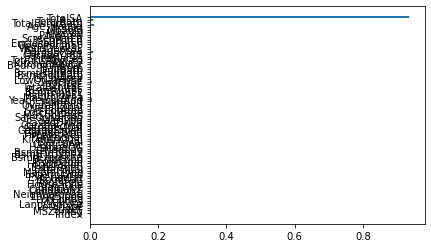

In [ ]:
X1 = housing_smogn.drop(['SalePrice'], axis=1)
pyplot.barh(X1.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

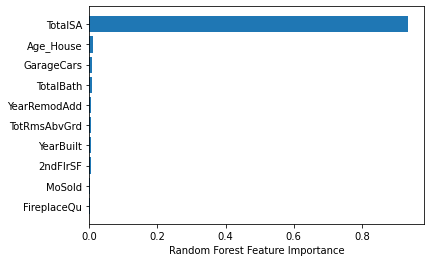

In [ ]:
sorted_idx = clf.feature_importances_.argsort()[70:]
pyplot.barh(X1.columns[sorted_idx], clf.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")

Feature: 0, Score: -1167753.47795
Feature: 1, Score: -202649153.50329
Feature: 2, Score: 1648743012.23729
Feature: 3, Score: -1645105205.51661
Feature: 4, Score: -69584441.81618
Feature: 5, Score: 0.01390
Feature: 6, Score: 133267883.01373
Feature: 7, Score: -1957503697.70387
Feature: 8, Score: 63356983.68706
Feature: 9, Score: -588087119.48172
Feature: 10, Score: -6199894101.07529
Feature: 11, Score: 206307458.51641
Feature: 12, Score: -211215869.23068
Feature: 13, Score: 890648834.75581
Feature: 14, Score: -407725573.57935
Feature: 15, Score: -262129905.33114
Feature: 16, Score: 122034785.96817
Feature: 17, Score: 885824923.24310
Feature: 18, Score: 999099144.50651
Feature: 19, Score: 83212796.56635
Feature: 20, Score: 1336230302.86308
Feature: 21, Score: -580099734.70923
Feature: 22, Score: 65249944.25037
Feature: 23, Score: 2043090106.15906
Feature: 24, Score: -271689866.74198
Feature: 25, Score: 530438079.59940
Feature: 26, Score: 2695457690.50598
Feature: 27, Score: 759251602.558

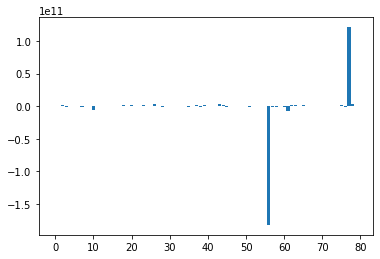

In [ ]:
#Linear Regression
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)[:10]
pyplot.show()

Text(0.5, 0, 'Linear Regression Feature Importance')

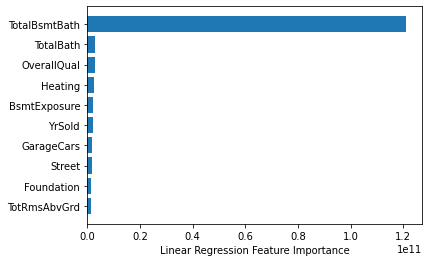

In [ ]:
sorted_idx = model.coef_.argsort()[70:]
pyplot.barh(X1.columns[sorted_idx], model.coef_[sorted_idx])
pyplot.xlabel("Linear Regression Feature Importance")

In [ ]:
#feature importance

clf = GradientBoostingRegressor(random_state=1)
clf.fit(X_train, y_train)
clf.feature_importances_
#len(clf.feature_importances_)

array([5.67550982e-03, 4.18116020e-04, 0.00000000e+00, 2.19941055e-03,
       2.77702564e-03, 0.00000000e+00, 2.28376240e-04, 0.00000000e+00,
       1.28533873e-03, 3.44418484e-04, 7.84872307e-04, 0.00000000e+00,
       2.34723003e-04, 8.55607600e-05, 2.80110104e-04, 8.50002254e-04,
       3.40172979e-04, 2.46992751e-04, 3.37225112e-03, 1.59028062e-06,
       0.00000000e+00, 3.31492019e-03, 0.00000000e+00, 5.41539746e-05,
       4.64044252e-05, 4.83613906e-04, 0.00000000e+00, 1.41912335e-05,
       4.19715810e-04, 3.39576574e-04, 1.01312712e-02, 2.89201095e-04,
       2.12180488e-03, 3.97084241e-04, 1.03268110e-03, 3.08100731e-04,
       0.00000000e+00, 8.30964753e-05, 5.43594825e-04, 2.77271659e-03,
       2.69834840e-04, 2.72392222e-03, 7.09374149e-03, 8.86512509e-02,
       2.23526114e-03, 7.07052322e-03, 6.27551144e-03, 7.90832998e-03,
       2.17880155e-02, 1.07899841e-03, 2.59508746e-03, 3.61762349e-03,
       2.37983556e-03, 8.27118741e-03, 0.00000000e+00, 2.33087978e-02,
      

<BarContainer object of 80 artists>

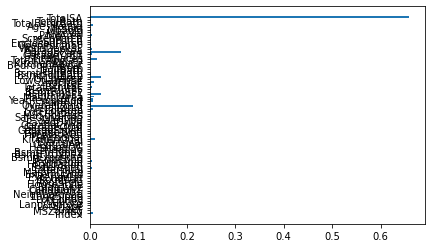

In [ ]:
pyplot.barh(X1.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

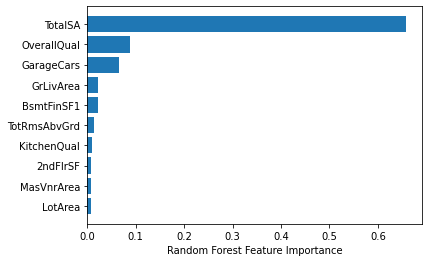

In [ ]:
sorted_idx = clf.feature_importances_.argsort()[70:]
pyplot.barh(X1.columns[sorted_idx], clf.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")

In [ ]:

clf = XGBRegressor()
clf.fit(X_train, y_train)
clf.feature_importances_
#len(clf.feature_importances_)

[07:39:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([4.90033068e-03, 7.72298430e-04, 0.00000000e+00, 5.06506441e-03,
       1.10804411e-02, 0.00000000e+00, 2.26106239e-03, 3.16134514e-03,
       3.09244567e-03, 7.08520366e-03, 5.93586871e-03, 3.28410621e-04,
       1.08754874e-04, 1.85616489e-03, 2.17113621e-03, 2.77099665e-03,
       1.22909714e-03, 1.88306940e-03, 6.58996776e-02, 0.00000000e+00,
       0.00000000e+00, 3.01688351e-02, 0.00000000e+00, 1.48319616e-03,
       6.84367353e-03, 3.44024203e-03, 0.00000000e+00, 6.71080372e-04,
       6.49682526e-03, 9.20912658e-04, 2.94488948e-02, 1.40195340e-03,
       1.57682877e-02, 3.41747142e-03, 2.21343003e-02, 6.39870390e-03,
       0.00000000e+00, 1.80517047e-04, 0.00000000e+00, 5.44166705e-03,
       2.11163002e-04, 4.38106526e-03, 4.55365982e-03, 7.70268962e-02,
       3.07353586e-03, 1.81125421e-02, 1.80854257e-02, 8.93084612e-03,
       1.09386565e-02, 3.20753525e-03, 3.21918726e-03, 3.26694152e-03,
       3.76922078e-03, 8.02989397e-03, 0.00000000e+00, 1.42408554e-02,
      

<BarContainer object of 80 artists>

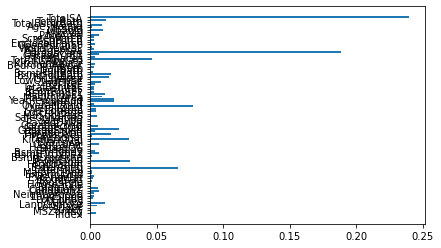

In [ ]:
pyplot.barh(X1.columns, clf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

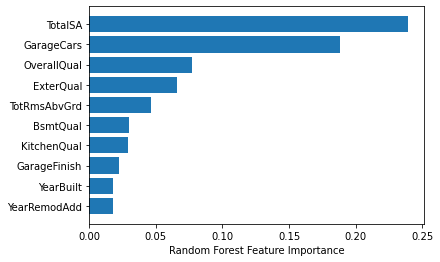

In [ ]:
sorted_idx = clf.feature_importances_.argsort()[70:]
pyplot.barh(X1.columns[sorted_idx], clf.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")